In [132]:
from music21 import *    # convert midi to numerical data and vice versa
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K
from keras.models import load_model
import random

In [133]:
# transform musical file in numerical data
def read_midi(file):
    print('Loading music file: ' + str(file))
    
    notes = []
    notes_to_parse = None
    
    midi = converter.parse(file)
    instruments = instrument.partitionByInstrument(midi)
    
    for part in instruments.parts:
        
        if 'Piano' in str(part):
            
            note_to_parse = part.recurse()
            
            for e in note_to_parse:
                
                #note
                if isinstance(e, note.Note):
                    notes.append(str(e.pitch))
                
                #chord
                elif isinstance(e, chord.Chord):
                    notes.append('.'.join(str(n) for n in e.normalOrder))
    return np.array(notes)
        
        

In [134]:
# read the files names of the training music
files = [i for i in os.listdir('train/') if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi('train/'+i) for i in files])

Loading music file: train/beethoven_opus22_1_format0.mid
Loading music file: train/beethoven_les_adieux_3_format0.mid
Loading music file: train/appass_2_format0.mid
Loading music file: train/waldstein_1_format0.mid
Loading music file: train/beethoven_hammerklavier_4_format0.mid
Loading music file: train/beethoven_hammerklavier_1_format0.mid
Loading music file: train/beethoven_opus22_4_format0.mid
Loading music file: train/pathetique_3_format0.mid
Loading music file: train/beethoven_hammerklavier_2_format0.mid
Loading music file: train/mond_3_format0.mid
Loading music file: train/beethoven_opus10_3_format0.mid
Loading music file: train/waldstein_2_format0.mid
Loading music file: train/appass_1_format0.mid
Loading music file: train/beethoven_opus22_2_format0.mid
Loading music file: train/beethoven_opus90_1_format0.mid
Loading music file: train/mond_1_format0.mid
Loading music file: train/pathetique_1_format0.mid
Loading music file: train/beethoven_opus10_1_format0.mid
Loading music file:

In [135]:
print(notes_array)

[array(['B-3', 'D4', 'A3', ..., '10.2', '9.0.3.5', '10.2.5'], dtype='<U8')
 array(['2.5.8.10', '10', '9.2', ..., '3.7.10', '2.5.8.10', '3.7.10'],
      dtype='<U12')
 array(['1.5.8', '6.10.1', '1.5.8', ..., 'E4', 'G4', '1.4.7.10'],
      dtype='<U8')
 array([], dtype=float64)
 array(['F2', 'F3', 'F3', ..., '10.2.5', '9.0.3.5', '10.2.5'], dtype='<U8')
 array(['B-1', '10.2.5', '10.2.5', ..., 'B-1', '10.2.5', '10'],
      dtype='<U10')
 array(['F5', 'G5', 'F5', ..., '9.0.3.5', '10.2', '9.0.3.5'], dtype='<U12')
 array([], dtype=float64)
 array(['10.2', '5.9.0', '5.9.0', '10.2.5', '7.10', '2.6.9', '2.6.9',
       '7.10.2', '3.7', '10.2.5', '10.2.5', '3.7.10', '3.7.10', '9.0.3.5',
       '9.0.3', 'F3', '10.2', '5', '10.2', '9.0', '5.9.0', 'F3',
       '2.5.8.10', 'B-4', '2.5.8', '3.7', '3.7.10', '10.1.5', '4.7.10.0',
       '5.9.0', '10.2', '5.9.0', '5.9.0', '10.2.5', '7.10', '2.6.9',
       '2.6.9', '7.10.2', '3.7', '10.2.5', '10.2.5', '3.7.10', '3.7.10',
       '9.0.3.5', '9.0.3', 'F4', '1

In [136]:

# 2D array into 1D array
notes = [e for n in notes_array for e in n]

#Number of unique notes
unique_notes = list(set(notes))
print(len(unique_notes))

367


(array([261.,  34.,  20.,  14.,   7.,   6.,   9.,   7.,   6.,   3.]),
 array([1.000e+00, 1.230e+02, 2.450e+02, 3.670e+02, 4.890e+02, 6.110e+02,
        7.330e+02, 8.550e+02, 9.770e+02, 1.099e+03, 1.221e+03]),
 <BarContainer object of 10 artists>)

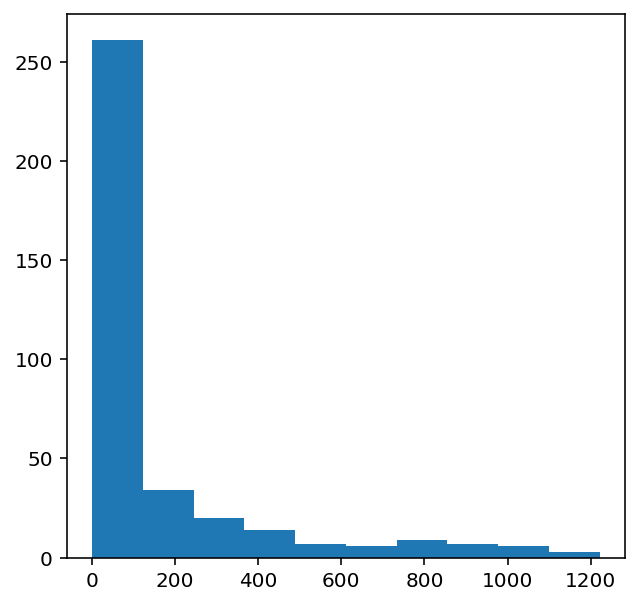

In [137]:
freq = dict(Counter(notes))

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [140]:
frequent_notes = [note_ for note_, count in freq.items() if count>=40]
print(len(frequent_notes))

167


In [141]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

In [142]:
print(new_music)

[list(['B-3', 'D4', 'A3', 'B-3', 'F3', '10.2.5', '10.2', 'B-3', 'D4', 'A3', 'B-3', 'F3', '10.2.5', '10.2', 'D4', 'B-3', 'A3', 'B-3', 'F3', 'F4', 'D4', 'C#4', 'D4', 'B-3', 'F4', 'B-4', 'E4', 'F4', 'D4', 'B-4', 'D5', 'A4', 'B-4', 'F4', 'D5', 'F5', 'C#5', 'D5', 'B-4', 'B-5', 'B-2', 'D3', 'F3', 'B-3', 'B-2', 'D3', 'F3', 'B-3', 'B-2', 'D3', 'F3', 'B-3', '10.2', '0.5', '10', 'A5', 'B-2', 'E-3', 'G5', 'G3', 'B-3', 'F5', 'B-2', 'E-3', 'E-5', 'G3', 'B-3', 'D5', 'B-2', 'E-3', 'C5', 'F3', 'A3', 'G5', 'B-2', 'E-3', 'F5', 'F3', 'A3', 'E-5', 'B-2', 'D3', 'F3', 'B-3', 'D5', 'B-2', 'D3', 'F3', 'B-3', 'B-2', 'D3', 'F3', 'G#3', '10.2', '0.5', '8.10', 'G#4', 'B-2', 'E-3', 'G4', 'G3', 'E-3', 'F4', 'B-2', 'E-3', 'E-4', 'G3', 'E-3', 'D4', 'B-2', 'C3', 'C4', 'E-3', 'F3', 'E-4', 'B-2', 'C3', 'A3', 'E-3', 'F3', '10', 'D4', 'C4', '10', '9', '10', '7', '5', 'G4', 'F4', '3', '2', '3', '0', '10', 'D5', 'C5', '10', '9', '10', '7', '5', 'G5', 'F5', '3', '2', '3', '0', '10', '0', '2', '3', '5', '7', '9', '10.0', 'B-4

In [143]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output notes sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [144]:
# Giving every unique note a unique int
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

unique_y = list(set(y.ravel()))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))

In [145]:
print(x_note_to_int)

{'B3': 0, '1.4.7.10': 1, 'B-1': 2, '3.8': 3, '7.0': 4, 'F#6': 5, '4.8': 6, '10.1.5': 7, 'E4': 8, 'G4': 9, '10.0': 10, 'B-4': 11, 'E3': 12, '5.9.0': 13, 'F4': 14, '6.10': 15, '3.6': 16, '10.1': 17, 'D2': 18, '3.7.10': 19, 'E-5': 20, 'F1': 21, 'E2': 22, '6.11': 23, '11.1': 24, 'E-3': 25, 'B2': 26, 'F6': 27, 'G#3': 28, 'A6': 29, '1': 30, '0.3': 31, '2.5.8.11': 32, '8': 33, 'F#3': 34, 'E-2': 35, '5.8.10': 36, 'C#2': 37, 'C7': 38, '7.10': 39, '11.2': 40, 'B4': 41, 'G#2': 42, 'D5': 43, '2.7': 44, 'F2': 45, 'G1': 46, '1.4.8': 47, '3.6.9': 48, 'E6': 49, '9.0.3.5': 50, '4.7.10.0': 51, 'F3': 52, '10.0.4': 53, '8.0.3': 54, '5.7': 55, '6.10.1': 56, '8.11.3': 57, 'G#5': 58, 'A2': 59, 'B5': 60, '8.10.2': 61, '7.11.2': 62, '8.1': 63, '1.3': 64, '10.2.5': 65, '2.5.8.10': 66, 'C#6': 67, '6': 68, '7.10.1': 69, '6.9.0': 70, '3': 71, 'F#5': 72, '10.3': 73, 'C#3': 74, 'F5': 75, '7.10.0': 76, '1.5.8': 77, 'C4': 78, '9.0': 79, '2.6.9': 80, '7.11': 81, '0.3.6': 82, '11.3': 83, '8.11': 84, '4.7.10': 85, 'C#4':

In [146]:
# transforming the input sequence
x_sequence=[]
for i in x:
    lx=[]
    for j in i:
        #assigning unique integer to every note
        lx.append(x_note_to_int[j])
    x_sequence.append(lx)
    
x_sequence = np.array(x_sequence)

In [147]:
# transforming the output sequence
y_sequence = np.array([y_note_to_int[i] for i in y])

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x_sequence, y_sequence, test_size = 0.2, random_state = 0)

In [149]:
# DEFINE WAVENET MODEL
K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           16700     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [150]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [151]:
history = model.fit(np.array(x_train),np.array(y_train),batch_size=128,epochs=50, validation_data=(np.array(x_test),np.array(y_test)),verbose=1, callbacks=[mc])


Epoch 1/50
330/330 [==============================] - ETA: 0s - loss: 4.4368
Epoch 00001: val_loss improved from inf to 4.17179, saving model to best_model.h5
330/330 [==============================] - 7s 22ms/step - loss: 4.4368 - val_loss: 4.1718
Epoch 2/50
329/330 [============================>.] - ETA: 0s - loss: 3.9194
Epoch 00002: val_loss improved from 4.17179 to 3.90494, saving model to best_model.h5
330/330 [==============================] - 8s 24ms/step - loss: 3.9196 - val_loss: 3.9049
Epoch 3/50
329/330 [============================>.] - ETA: 0s - loss: 3.7183
Epoch 00003: val_loss improved from 3.90494 to 3.85695, saving model to best_model.h5
330/330 [==============================] - 8s 25ms/step - loss: 3.7181 - val_loss: 3.8570
Epoch 4/50
328/330 [============================>.] - ETA: 0s - loss: 3.5847
Epoch 00004: val_loss improved from 3.85695 to 3.72731, saving model to best_model.h5
330/330 [==============================] - 8s 24ms/step - loss: 3.5844 - val_loss:

Epoch 34/50
330/330 [==============================] - ETA: 0s - loss: 2.5637
Epoch 00034: val_loss improved from 3.10026 to 3.08874, saving model to best_model.h5
330/330 [==============================] - 9s 27ms/step - loss: 2.5637 - val_loss: 3.0887
Epoch 35/50
329/330 [============================>.] - ETA: 0s - loss: 2.5485
Epoch 00035: val_loss improved from 3.08874 to 3.08780, saving model to best_model.h5
330/330 [==============================] - 9s 28ms/step - loss: 2.5486 - val_loss: 3.0878
Epoch 36/50
329/330 [============================>.] - ETA: 0s - loss: 2.5324
Epoch 00036: val_loss improved from 3.08780 to 3.08070, saving model to best_model.h5
330/330 [==============================] - 9s 28ms/step - loss: 2.5323 - val_loss: 3.0807
Epoch 37/50
328/330 [============================>.] - ETA: 0s - loss: 2.5203
Epoch 00037: val_loss improved from 3.08070 to 3.07313, saving model to best_model.h5
330/330 [==============================] - 9s 28ms/step - loss: 2.5206 - v

In [152]:
model = load_model('best_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           16700     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [153]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


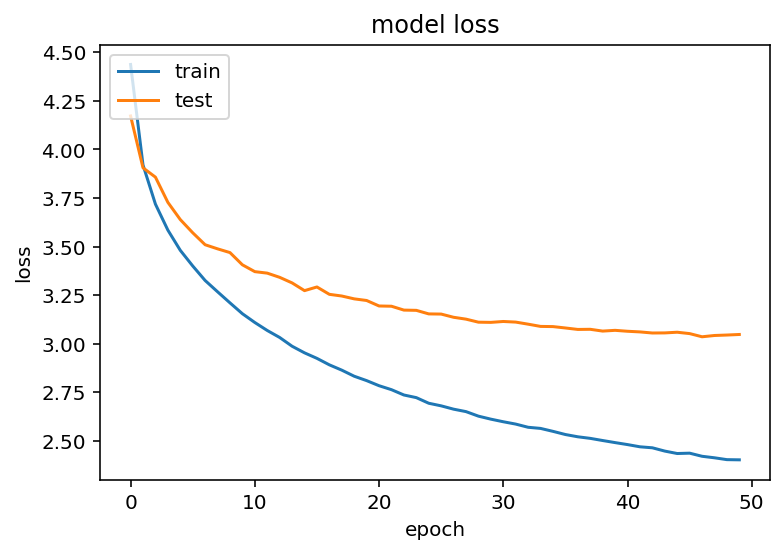

In [154]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [159]:
# Generate music
ind = np.random.randint(0,len(x_test)-1)

random_music = x_test[ind]

predictions=[]
for i in range(60):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[84, 84, 84, 84, 84, 84, 84, 83, 84, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 83, 83, 83, 17, 17, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 15, 84, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 118, 16, 16]


In [160]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]
print(predicted_notes)

['8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '11.3', '8.11', '11.3', '11.3', '11.3', '11.3', '11.3', '8.11', '8.11', '8.11', '8.11', '8.11', '11.3', '11.3', '11.3', '10.1', '10.1', '11.3', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '8.11', '6.10', '8.11', '6.10', '6.10', '6.10', '6.10', '6.10', '6.10', '6.10', '6.10', '6.10', '6.10', '6.10', '3.6', '3.6', '3.6', '5.8', '3.6', '3.6']


In [163]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [164]:
convert_to_midi(predicted_notes)